In [9]:
# Import Libraries 
# ----------------------------------------------
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def d(comp,inpu,dire):
    if(comp=='x'): idim = 0
    elif(comp=='z'): idim = 1
    
    if(dire == '+'):
        return (np.roll(inpu, -1, axis = idim)-inpu)/dx
    elif(dire == '-'):
        return (inpu - np.roll(inpu, 1, axis = idim))/dx

In [11]:
# Input Parameter
# ----------------------------------------------

# Discretization
c1=20           # Number of grid points per dominant wavelength
c2=0.6          # CFL-Number
nx=400          # number of grid points in x-direction
nz=400          # number of grid points in z-direction
Tt=0.50
idisp = 5 # display frequency
 
# Source Signal
f0= 25      # Center frequency Ricker-wavelet
aa= 1/f0
q0= 1      # Maximum amplitude Ricker-Wavelet
xscr = int(nx/2)-1;  zscr = int(nz/2)-1 # Source position (in grid points)

In [12]:
# Velocity and density
model_vp=3000   # P-wave velocity in m/s
model_vs=1500   # S-wave velocity in m/s
rho= 2200      # Density in g/cm^3

In [13]:
## Preparation 

# Init wavefields
vx=np.zeros((nx,nz))
vz=np.zeros((nx,nz))
txx=np.zeros((nx,nz))
tzz=np.zeros((nx,nz))
txz=np.zeros((nx,nz))
#vz_x=np.zeros((nx,nz))
#vx_z=np.zeros((nx,nz))
#vx_x=np.zeros((nx,nz))
#vz_z=np.zeros((nx,nz))
vol   = np.zeros([nx,nz])
curl  = np.zeros([nx,nz])

# Calculate Lame  Parameters
lam=rho*(model_vp**2 - 2*model_vs**2)
mu=rho*model_vs**2 

cmin=model_vp  # Lowest P-wave velocity
cmax=model_vp  # Highest P-wave velocity
fmax=2*f0              # Maximum frequency
dx=cmin/(fmax*c1)      # Spatial discretization (in m)
dz=dx 
dt=dx/(cmax)*c2        # Temporal discretization (in s)
lampda_min=cmin/fmax   # Smallest wavelength

# Create space and time vector
x=np.arange(0,dx*nx-dx,dx) # Space vector
z=np.arange(0,(dz*nz-dz),dz) # Space vector
t=np.arange(0,(Tt-dt),dt)    # Time vector
nt=len(t)       # Number of time steps

In [14]:
# Source signal - Ricker-wavelet
#tau=np.pi*f0*(t-1.5/f0)
#q=q0*(1-2*tau**2)*np.exp(-tau**2)

# Initialise source
s = np.zeros(nt)
t0 = 3. * aa/dt
for i in range(1,nt+1):
    s[i-1]= np.exp(- 1./aa**2*((i-t0)*dt)**2)
print(' %r <source< %r' %(s.min(),s.max()))

# Plotting source signal
plt.ion()
fig4 = plt.figure(figsize=(9,4.5))
plt.plot(t,s)
plt.title('Source signal Ricker-Wavelet')
plt.xlabel('Time in s')
plt.ylabel('Amplitude')
plt.show()

 7.017301340951494e-40 <source< 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


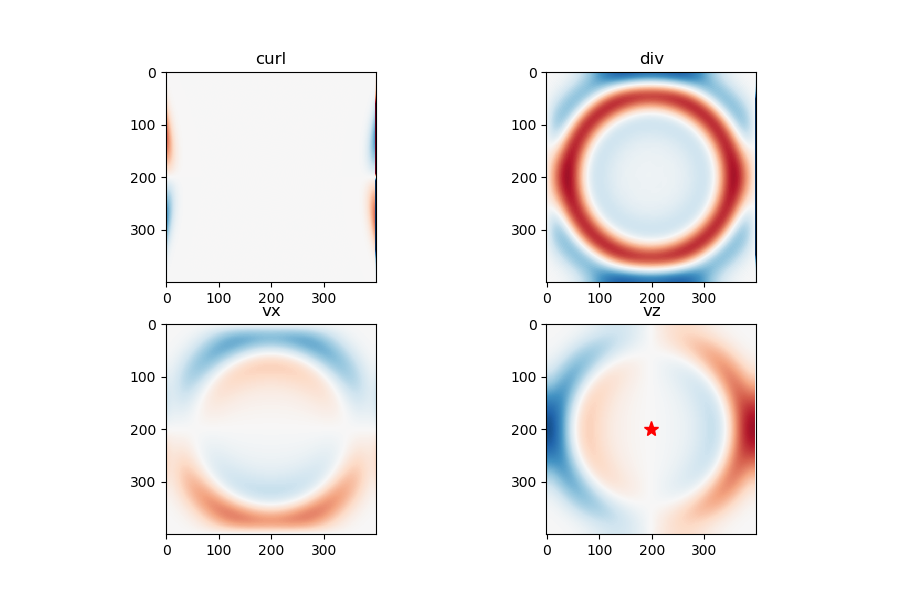

In [15]:
# Plot preparation
# Initialize animated plot
plt.ion()
fig5 = plt.figure(figsize=(9,6))
f1 = fig5.add_subplot(2, 2, 1)
f2 = fig5.add_subplot(2, 2, 2)
f3 = fig5.add_subplot(2, 2, 3)
f4 = fig5.add_subplot(2, 2, 4)
f1.set_title('curl')
f2.set_title('div')
f3.set_title('vx')
f4.set_title('vz')

curlp = f1.imshow(curl, interpolation='nearest', animated=True,
                   vmin=-1.0e-11, vmax=1.0e-11, cmap=plt.cm.RdBu)
divp = f2.imshow(vol, interpolation='nearest', animated=True,
                   vmin=-1.0e-11, vmax=1.0e-11, cmap=plt.cm.RdBu)
vxp = f3.imshow(vx, interpolation='nearest', animated=True,
                   vmin=-1.0e-09, vmax=1.0e-09, cmap=plt.cm.RdBu)
vzp = f4.imshow(vz, interpolation='nearest', animated=True,
                   vmin=-1.0e-09, vmax=1.0e-09, cmap=plt.cm.RdBu)

# Plot the receivers
#for x, z in zip(irx, irz):
#    plt.text(x, z, '+')

plt.plot(zscr, xscr, 'r*', markersize=11)
#plt.colorbar()
#plt.xlabel('ix')
#plt.ylabel('iz')
plt.show()


In [ ]:
for n in range(1,nt+1):

    # Inject source wavelet (explosion)
#    txx[xscr,zscr]=txx[xscr,zscr]+q[n]
#    tzz[xscr,zscr]=tzz[xscr,zscr]+q[n]
        
    txx[xscr,zscr]=txx[xscr,zscr]+s[int(n)-1]   
    tzz[xscr,zscr]=tzz[xscr,zscr]+s[int(n)-1]
    
    txx[:,0] = 0.
    tzz[:,0] = 0.
    txz[:,0] = 0.
    txx[:,nz-1] = 0.
    tzz[:,nz-1] = 0.
    txz[:,nz-1] = 0.
    
    # Update velocity
#    # Calculating spatial derivative
#    for i in range(1, nx-1):
#        for j in range(1, nz-1):
#            txx_x = (txx[i,j+1]-txx[i,j])/dx
#            tzz_z = (tzz[i+1,j]-tzz[i,j])/dz
#            txz_x = (txz[i,j]-txz[i,j-1])/dx
#            txz_z = (txz[i,j]-txz[i-1,j])/dz
           
    # Update velocity
    vx=vx+(dt/rho)*(d('x',txx,'-') + d('z',txz,'-'))
    vz=vz+(dt/rho)*(d('x',txz,'+') + d('z',tzz,'+'))
            
    curl = d('z',vx,'+') - d('x',vz,'-')
    vol = d('x',vx,'+') + d('z',vz,'-')            


#    # Calculating spatial derivative
#    for i in range(1, nx-1):
#        for j in range(1, nz-1):
#            vx_x[i,j] = (vx[i,j]-vx[i,j-1])/dx
#            vz_z[i,j] = (vz[i,j]-vz[i-1,j])/dz
#            vz_x[i,j] = (vz[i,j+1]-vz[i,j])/dx        
#            vx_z[i,j] = (vx[i+1,j]-vx[i,j])/dz
                       
    # Update pressure

    txx=txx+(lam *  vol + 2*mu * d('x',vx,'+')  ) * dt
    tzz=tzz+(lam *  vol + 2*mu * d('z',vz,'-')  ) * dt
    txz=txz+(mu * (d('z',vx,'+') + d('x',vz,'-') ) ) * dt 
                
        # Plot every time step (nt)
    if (n % idisp) == 0:
        #plt.title('Time Step (nt) = %d' % n)    
        curlp.set_data(curl)
        divp.set_data(vol)
        vxp.set_data(vx)
        vzp.set_data(vz)
        plt.gcf().canvas.draw()
        